#### Dataset Used in this project

erson Audio-Visual Database of Emotional Speech and Song (Ravdess)
Surrey Audio-Visual Expressed Emotion (Savee)
Toronto emotional speech set (Tess)

### Importation

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import librosa 
import IPython.display as ipd
import seaborn as sns
import librosa.display 
import os 
import keras 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import glob
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
from rich.console import Console
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D,Dropout,Flatten,Dense
from keras.callbacks import ReduceLROnPlateau
import time






In [32]:
model_start_time = time.time()

## Preprocessig Data

#### Ravdess

In [33]:
# Paths
Ravdess="C:\\Users\\DELL\\Downloads\\archive (2)"

In [34]:
ravdess_dir_list= os.listdir(Ravdess)
ravdess_dir_list=["C:\\Users\\DELL\\Downloads\\archive (2)\\"+element for element in ravdess_dir_list]
file_emotion=[]
file_path=[]
for i in range (1,25):
    if i >=10 :
        actor=os.listdir(r"C:\Users\DELL\Downloads\archive (2)\Actor_"+f'{i}')
    else:
        actor=os.listdir(r"C:\Users\DELL\Downloads\archive (2)\Actor_0"+f'{i}')
    for file in actor :
        part=file.split('.')[0]
        part=part.split('-')
        file_emotion.append(int(part[0]))
        file_path.append(ravdess_dir_list[i-1]+ '\\' + file)
df=pd.DataFrame(file_emotion,columns=["Emotion_labels"])
df['path']=pd.DataFrame(file_path)
mapping={1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}
df['Emotion']=df['Emotion_labels'].map(mapping)
Ravdess_df=df.drop(labels='Emotion_labels',axis=1)
Ravdess_df.head()

,path,Emotion
0,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy
1,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy
2,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy
3,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy
4,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy


#### Crema DataFrame

In [35]:
# Data
Crema_zip_file=r"C:\Users\DELL\Downloads\archive (3).zip"
# unzipping the file 
import zipfile
zip_ref=zipfile.ZipFile(Crema_zip_file,'r')
zip_ref.extractall(r"C:\Users\DELL\Downloads\archive (3)")

In [36]:
crema_dir_list=os.listdir(r"C:\Users\DELL\Downloads\archive (3)\AudioWAV")
file_emotion=[]
file_path=[]
for file in crema_dir_list:
    file_path.append(r"C:\Users\DELL\Downloads\archive (3)\AudioWAV"+'\\'+file)
    part =file.split("_")
    P=part[2]
    if P== "ANG":
        file_emotion.append('angry')
    elif P=="DIS":
        file_emotion.append('disgust')
    elif P=="FEA":
        file_emotion.append('fear')
    elif P=="HAP":
        file_emotion.append('happy')
    elif P=="NEU":
        file_emotion.append('neutral')
    elif P=="SAD":
        file_emotion.append("sad")
    else:
        file_emotion.append("Unkown")
Crema_df=pd.DataFrame(file_path,columns=["path"])
Crema_df['Emotion']=pd.DataFrame(file_emotion)
Crema_df.head()

,path,Emotion
0,C:\Users\DELL\Downloads\archive (3)\AudioWAV\1...,angry
1,C:\Users\DELL\Downloads\archive (3)\AudioWAV\1...,disgust
2,C:\Users\DELL\Downloads\archive (3)\AudioWAV\1...,fear
3,C:\Users\DELL\Downloads\archive (3)\AudioWAV\1...,happy
4,C:\Users\DELL\Downloads\archive (3)\AudioWAV\1...,neutral


#### Tess Dataset

In [37]:
# Data
Tess_zip_file=r"C:\Users\DELL\Downloads\archive (1).zip"
# unzipping the file 
zip_ref=zipfile.ZipFile(Tess_zip_file,'r')
zip_ref.extractall(r"C:\Users\DELL\Downloads\archive (1)")

In [38]:
dirs=os.listdir(r"C:\Users\DELL\Downloads\archive (1)\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data")

In [39]:
toss =r"C:\Users\DELL\Downloads\archive (1)\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data"
toss_emotion=[]
toss_paths=[]
dirs=['\\'+dir for dir in dirs]
for dir in dirs:
    files=os.listdir(toss+dir)
    for file in files:
        part=file.split('.')[0]
        part=part.split("_")[2]
        if part =="ps":
            toss_emotion.append('surprise')
        else:
            toss_emotion.append(part)
        toss_paths.append(toss+dir+'\\'+file)
    
Toss_df=pd.DataFrame(toss_paths,columns=['path'])
Toss_df['Emotion']=pd.DataFrame(toss_emotion)
Toss_df.head()

,path,Emotion
0,C:\Users\DELL\Downloads\archive (1)\TESS Toron...,angry
1,C:\Users\DELL\Downloads\archive (1)\TESS Toron...,angry
2,C:\Users\DELL\Downloads\archive (1)\TESS Toron...,angry
3,C:\Users\DELL\Downloads\archive (1)\TESS Toron...,angry
4,C:\Users\DELL\Downloads\archive (1)\TESS Toron...,angry


#### Savee Dataset

In [40]:
Savee_zipped=r'C:\Users\DELL\Downloads\archive (4).zip'
zipfile=zipfile.ZipFile(Savee_zipped,'r')
zipfile.extractall(r'C:\Users\DELL\Downloads\archive (4)')

In [41]:
All=glob.glob(r"C:\Users\DELL\Downloads\archive (4)\*\*.wav")

In [42]:
Savee_emotion=[]
Savee_paths=[]
for all in All:
    Savee_paths.append(all)
    part=all.split('\\')[6]
    part=part.split('.')[0]
    part=part.split("_")[1][0]
    Savee_emotion.append(part)
Savee_df=pd.DataFrame(Savee_paths,columns=['path'])
Savee_df['emotion']=pd.DataFrame(Savee_emotion)
mapping={'a':'anger',
'd' : 'disgust',
'f' :'fear',
'h' : 'happiness',
'n' :'neutral',
'sa' :'sadness',
'su' : 'surprise'}
Savee_df['Emotion']=Savee_df['emotion'].map(mapping)
Savee_df=Savee_df.drop(labels='emotion',axis=1)
Savee_df.head()

,path,Emotion
0,C:\Users\DELL\Downloads\archive (4)\ALL\DC_a01...,anger
1,C:\Users\DELL\Downloads\archive (4)\ALL\DC_a02...,anger
2,C:\Users\DELL\Downloads\archive (4)\ALL\DC_a03...,anger
3,C:\Users\DELL\Downloads\archive (4)\ALL\DC_a04...,anger
4,C:\Users\DELL\Downloads\archive (4)\ALL\DC_a05...,anger


#### Concatnate the entire data

In [43]:
df=pd.concat([Ravdess_df,Crema_df,Savee_df,Toss_df],axis=0)
df.to_csv('df.csv',index=False)
df.head()

,path,Emotion
0,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy
1,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy
2,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy
3,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy
4,C:\Users\DELL\Downloads\archive (2)\Actor_01\0...,happy


#### Ensure If There is a NULL values

In [44]:
import os
import wave

def is_null_audio(paths):
    for i in paths:
            try:
                with wave.open(i, 'rb') as audio_file:
                    frames = audio_file.getnframes()
                    return frames == 0
            except wave.Error:
        # Handle non-wave files or other errors

                return False


In [45]:
paths=df['path']
is_null_audio(paths)

False

### Visualizing data

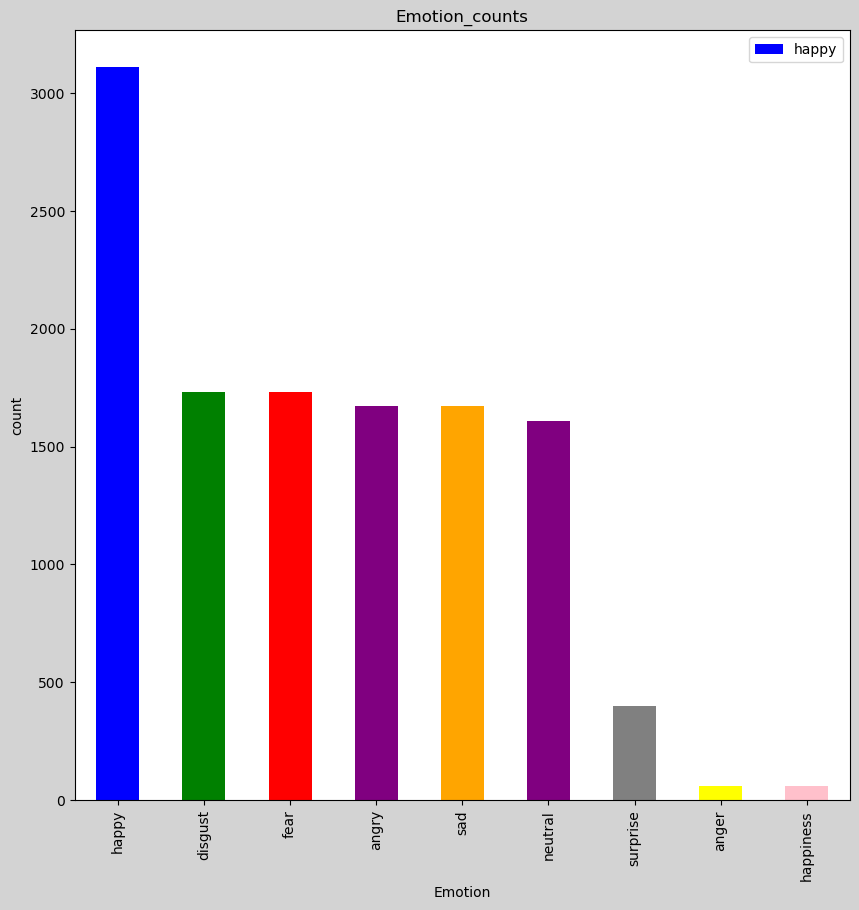

In [46]:
Emotion_counts=df['Emotion'].value_counts()
colors = ['blue', 'green', 'red', 'purple', 'orange','purple','gray','yellow','pink']
plt.figure(figsize=(10,10), facecolor='lightgrey')
Emotion_counts.plot(kind='bar',color=colors)
plt.title("Emotion_counts")
plt.ylabel('count')
plt.xlabel('Emotion')
plt.legend(Emotion_counts.index, loc='upper right')
plt.show()

In [47]:
import librosa.display
def create_waveplot(data,sr):
    plt.figure(figsize=(14,3))
    plt.title('Waveplot')
    librosa.display.waveshow(data,sr=sr)
    plt.show()
def create_spectogram(data,sr):
    plt.figure(figsize=(14,4))
    plt.title('Spectogram')
    D=librosa.stft(data)
    x_db=librosa.amplitude_to_db(abs(D))
    librosa.display.specshow(x_db,
                            x_axis='time',
                            y_axis='log')
    plt.colorbar(format=f'%0.2f')
    plt.show()
def create_trimmed(data,dp) :
    data_trimmed ,_ =librosa.effects.trim(data,top_db=dp)
    pd.Series(data_trimmed[10000:11000]).plot(figsize=(14,3),lw=2,title='Raw Audio Trimmed Example',color=color_pal[0])
    plt.show()
    
    

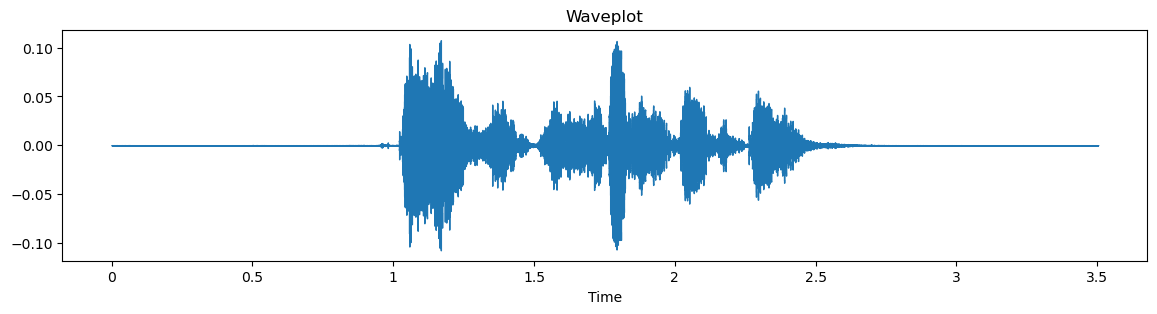

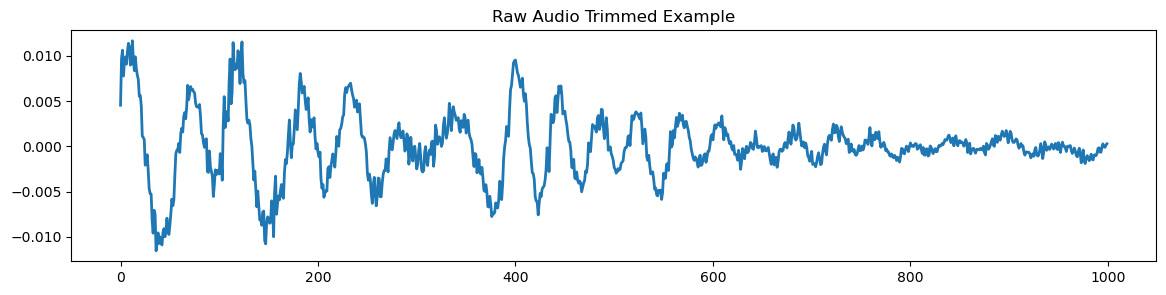

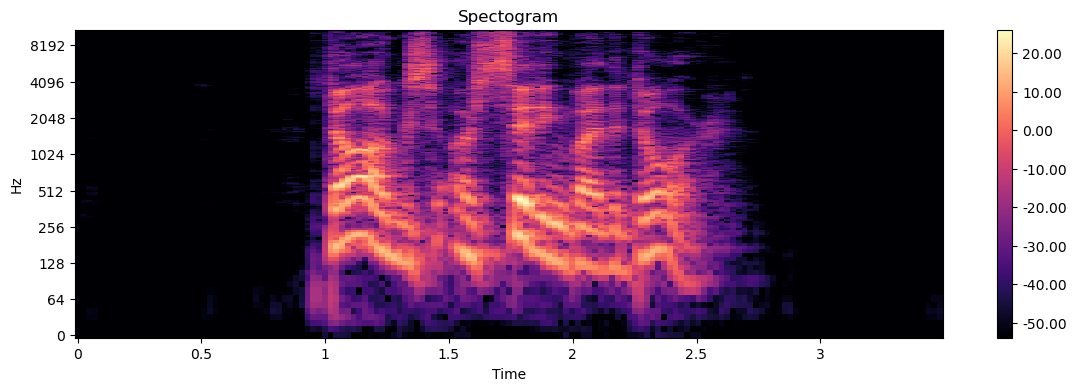

In [48]:
def visulize (feeling ,index):
    emotion=feeling     
    path=np.array(df.path[df.Emotion==emotion])[index]
    data,sr=librosa.load(path)
    create_waveplot(data,sr)
    create_trimmed(data,20)
    create_spectogram(data,sr)
    display(ipd.Audio(path))
visulize('happy',30)

### Data Augmentation

In [49]:
console=Console()
def simple_noise(df,index):
    console.print("simple", style="bold  green on blue",justify="center")
    path = np.array(df.path)[0]
    data, sr = librosa.load(path)
    display(Audio(path))
    create_waveplot(data,sr)
    noise_amp=0.035*np.random.uniform()*np.amax(data) # multiplying the maximum amplitude by a random fraction between 0 and 1, scaled by 0.035.
    data+=(noise_amp*np.random.normal(size=data.shape[0]))
    console.print("noise", style="bold blue on green",justify="center")
    display(Audio(data,rate=sr))
    create_waveplot(data,sr)
def simple_stretch (df,index,rate=.8):
    console.print("simple", style="bold  green on blue",justify="center")
    path = np.array(df.path)[0]
    data, sr = librosa.load(path)
    display(Audio(path))
    create_waveplot(data,sr)
    data=librosa.effects.time_stretch(data,rate=rate)
    console.print("stretched", style="bold blue on green",justify="center")
    display(Audio(data,rate=sr))
    create_waveplot(data,sr)
def simple_pitch (df,index,pitch_factor=0.7):
    console.print("simple", style="bold  green on blue",justify="center")
    path = np.array(df.path)[0]
    data, sr = librosa.load(path)
    display(Audio(path))
    create_waveplot(data,sr)
    data=librosa.effects.pitch_shift(data,sr=sr,n_steps=pitch_factor) #pitch_factor.A positive value shifts the pitch higher, negative value shifts it lower.
    console.print("pitched up", style="bold blue on green",justify="center")
    display(Audio(data,rate=sr))
    create_waveplot(data,sr)
def simple_shift (df,index):
    console.print("simple", style="bold  green on blue",justify="center")
    path = np.array(df.path)[0]
    data, sr = librosa.load(path)
    display(ipd.Audio(path))
    create_waveplot(data,sr)
    shift_range= int(np.random.uniform(low=-5,high=5)*1000)
    data= np.roll(data,shift_range)
    console.print("shifted", style="bold blue on green",justify="center")
    display(ipd.Audio(data,rate=sr))
    create_waveplot(data,sr)

                                                      simple                                                       

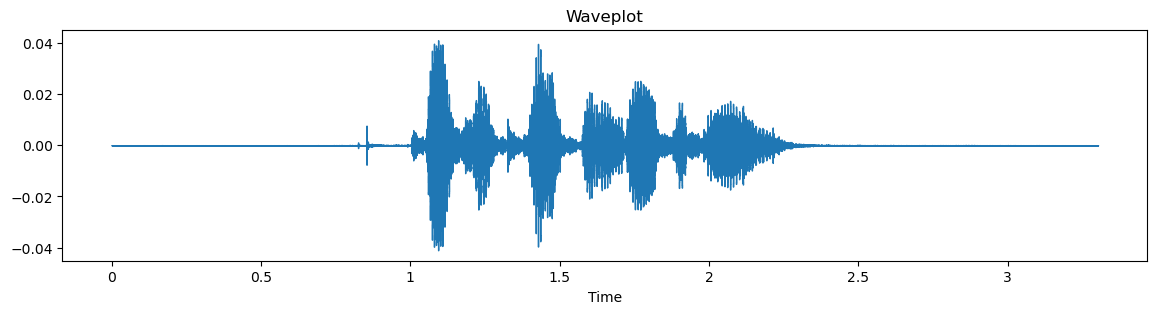

                                                      shifted                                                      

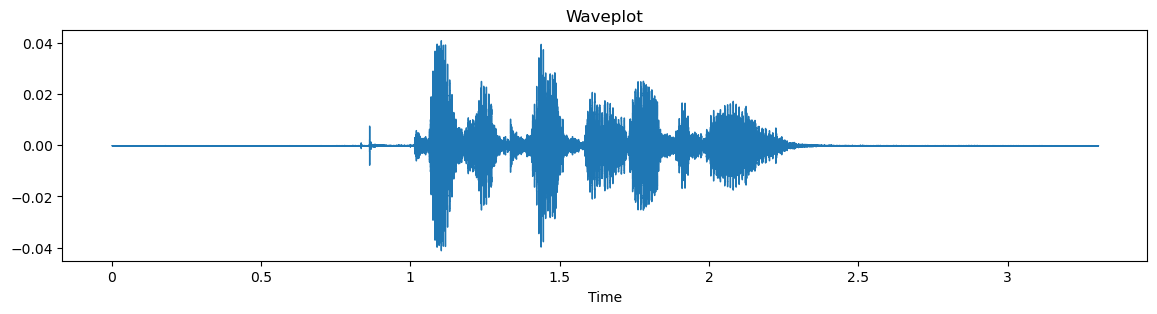

In [50]:
#Feel free to use any Augmentation function 
simple_shift(df,10)

### Feature Extraction 

1-Amplitude Evelope (AE)                                                                  
2-MFCC                                                                                    
3-MelSpectrogram                                                                                                                                                                   4-Zero Crossing Rate(ZCR)

In [51]:
def extract_features(data,sr):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)
    
    # data with noise
    noise_amp=0.035*np.random.uniform()*np.amax(data) # multiplying the maximum amplitude by a random fraction between 0 and 1, scaled by 0.035.
    noise_data=data+(noise_amp*np.random.normal(size=data.shape[0]))
    res2 = extract_features(noise_data,sample_rate)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data =librosa.effects.time_stretch(data,rate=.8)
    data_stretch_pitch = librosa.effects.pitch_shift(new_data,sr=sample_rate,n_steps=.7)
    res3 = extract_features(data_stretch_pitch,sample_rate)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [52]:
X, Y = [], []
for path, emotion in zip(df.path, df.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

C:\Users\DELL\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [53]:
Features = pd.DataFrame(X)
Features['labels'] = Y 
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.321275,0.729664,0.750032,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,4.310903e-06,3.291511e-06,2.148075e-06,2.279739e-06,5.116493e-06,8.190282e-06,0.000007,0.000005,4.245834e-07,happy
1,0.320190,0.810284,0.835396,0.818537,0.806983,0.808986,0.706077,0.669232,0.723072,0.764254,...,5.836790e-05,5.815467e-05,5.846540e-05,6.170103e-05,6.004231e-05,6.363659e-05,0.000060,0.000058,5.517107e-05,happy
2,0.188285,0.622130,0.699225,0.753333,0.721221,0.701736,0.682347,0.662826,0.686492,0.733961,...,8.577343e-07,9.576414e-07,7.733593e-07,5.233101e-07,3.592793e-07,9.261689e-07,0.000002,0.000001,7.753987e-08,happy
3,0.293566,0.673896,0.722096,0.723508,0.682302,0.680533,0.675352,0.628977,0.679179,0.707283,...,6.984504e-06,7.034949e-06,6.654923e-06,6.979548e-06,1.214236e-05,9.640183e-06,0.000011,0.000006,4.254087e-07,happy
4,0.340246,0.779906,0.822706,0.826612,0.802064,0.810634,0.762460,0.665631,0.701436,0.728999,...,1.717279e-04,1.764806e-04,1.835043e-04,1.832086e-04,1.763442e-04,1.819973e-04,0.000178,0.000182,1.714784e-04,happy


In [54]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 10), (9122, 162, 1), (9122, 10))

## 2-Models

### orig model

In [25]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)         

In [26]:
start_time=time.time()
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])
end_time=time.time()

Epoch 1/50


428/428 [==============================] - 20s 43ms/step - loss: 1.6135 - accuracy: 0.3643 - val_loss: 1.2975 - val_accuracy: 0.4935 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 18s 41ms/step - loss: 1.2842 - accuracy: 0.4839 - val_loss: 1.1394 - val_accuracy: 0.5474 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 17s 41ms/step - loss: 1.1843 - accuracy: 0.5268 - val_loss: 1.0957 - val_accuracy: 0.5679 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 17s 40ms/step - loss: 1.1217 - accuracy: 0.5519 - val_loss: 1.0857 - val_accuracy: 0.5645 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 17s 39ms/step - loss: 1.0853 - accuracy: 0.5655 - val_loss: 1.0292 - val_accuracy: 0.5844 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 17s 39ms/step - loss: 1.0518 - accuracy: 0.5800 - val_loss: 0.9921 - val_accuracy: 0.6001 - lr: 0.0010
Epoch 7/50
428/428 [==============================] - 17

286/286 [==============================] - 2s 9ms/step - loss: 0.9992 - accuracy: 0.6530
Accuracy of our model on test data :  65.30365943908691 %


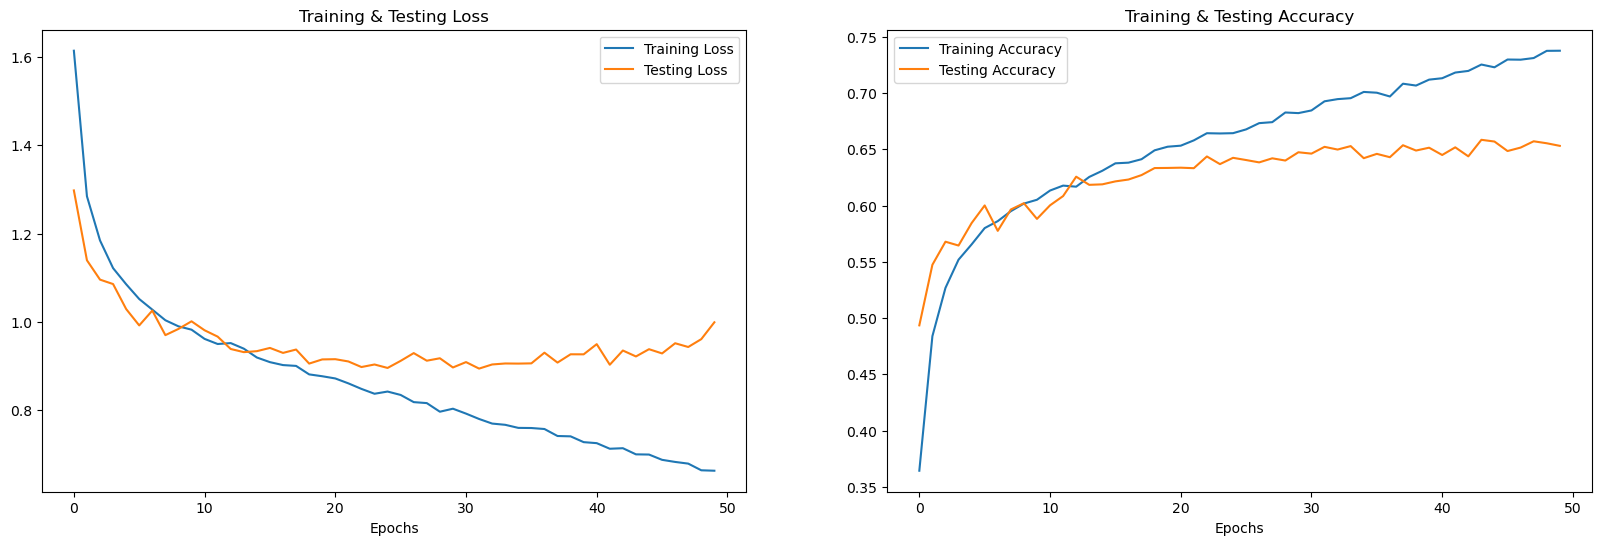

In [27]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [28]:
train_accuracy = history.history['accuracy'][-3:]
val_accuracy = history.history['val_accuracy'][-3:]
fitting_time_seconds = end_time - start_time
fitting_time_minutes = fitting_time_seconds // 60
fitting_time_seconds %= 60

avg_train_accuracy_last_three = (sum(train_accuracy) / len(train_accuracy))*100
avg_val_accuracy_last_three = (sum(val_accuracy) / len(val_accuracy))*100

print("Average Training Accuracy of Last Three Epochs:", round(avg_train_accuracy_last_three))
print("Average Validation Accuracy of Last Three Epochs:", round(avg_val_accuracy_last_three))
print("Model fitting time:", fitting_time_minutes, "minutes and", fitting_time_seconds, "seconds")


Average Training Accuracy of Last Three Epochs: 74
Average Validation Accuracy of Last Three Epochs: 66
Model fitting time: 15.0 minutes and 5.200245380401611 seconds


In [29]:
model_1_end_time=time.time()

##### as we see it's clear overfitting and huge processing time 

### Optimized model

In [55]:
model_2=Sequential()

model_2.add(Dense(512,input_shape=(x_train.shape[1],),activation='relu'))
model_2.add(Dropout(.2))

model_2.add(Dense(512,activation='relu'))
model_2.add(Dropout(.2))

model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(.2))

model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(.2))

model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(.2))

model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(.2))

# Output layer With 10 neurons as it has 10 classes
model_2.add(Dense(10,activation='softmax'))

In [56]:
model_2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


In [57]:
start_time = time.time()
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.000001)
history_2=model_2.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])
end_time = time.time()

Epoch 1/50
428/428 [==============================] - 4s 6ms/step - loss: 1.3557 - accuracy: 0.4764 - val_loss: 1.0513 - val_accuracy: 0.5761 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 2s 6ms/step - loss: 1.0643 - accuracy: 0.5804 - val_loss: 0.9779 - val_accuracy: 0.6035 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 2s 5ms/step - loss: 0.9998 - accuracy: 0.6021 - val_loss: 0.9393 - val_accuracy: 0.6206 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 2s 5ms/step - loss: 0.9593 - accuracy: 0.6176 - val_loss: 0.9471 - val_accuracy: 0.6211 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 2s 5ms/step - loss: 0.9364 - accuracy: 0.6255 - val_loss: 0.9182 - val_accuracy: 0.6253 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 2s 5ms/step - loss: 0.9253 - accuracy: 0.6349 - val_loss: 0.8979 - val_accuracy: 0.6349 - lr: 0.0010
Epoch 7/50
428/428 [==============================] - 2s 5ms/step - lo

286/286 [==============================] - 2s 6ms/step - loss: 0.9904 - accuracy: 0.6531
Accuracy of our model on test data :  65.31462669372559 %


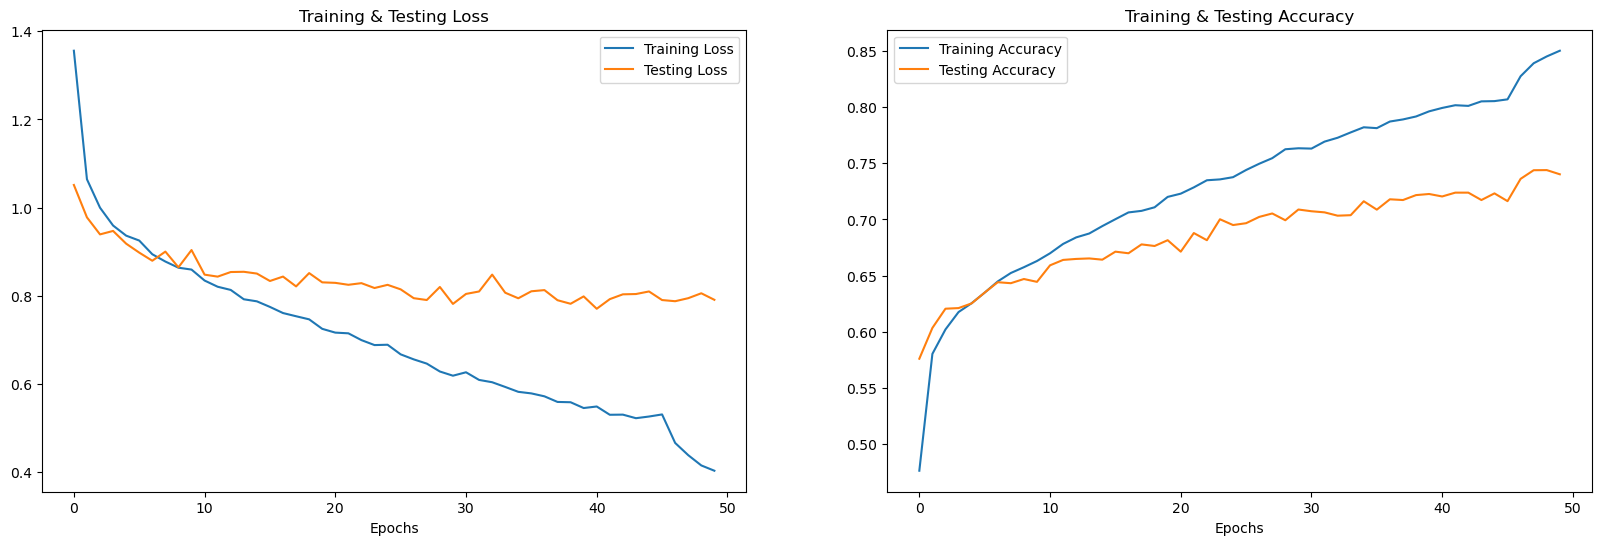

In [59]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history_2.history['accuracy']
train_loss = history_2.history['loss']
test_acc = history_2.history['val_accuracy']
test_loss = history_2.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [60]:
model_2_end_time=time.time()

In [61]:
train_accuracy = history_2.history['accuracy'][-3:]
val_accuracy = history_2.history['val_accuracy'][-3:]
fitting_time_seconds = end_time - start_time
fitting_time_minutes = fitting_time_seconds // 60
fitting_time_seconds %= 60

avg_train_accuracy_last_three = (sum(train_accuracy) / len(train_accuracy))*100
avg_val_accuracy_last_three = (sum(val_accuracy) / len(val_accuracy))*100

print("Average Training Accuracy of Last Three Epochs:", round(avg_train_accuracy_last_three))
print("Average Validation Accuracy of Last Three Epochs:", round(avg_val_accuracy_last_three))
print("Model fitting time:", fitting_time_minutes, "minutes and", fitting_time_seconds, "seconds")


Average Training Accuracy of Last Three Epochs: 84
Average Validation Accuracy of Last Three Epochs: 74
Model fitting time: 1.0 minutes and 57.1683394908905 seconds


as we see val_accuracy got increased by 10% and we overcome the overfitting in additition to we decreased the proccessing time to just only two minutes

In [30]:
total_fitting_time_seconds = model_1_end_time - model_start_time
total_fitting_time_minutes = total_fitting_time_seconds // 60
total_fitting_time_seconds %= 60
print("Model_1 fitting time:",total_fitting_time_minutes, "minutes and", total_fitting_time_seconds, "seconds")


Model_1 fitting time: 37.0 minutes and 54.5395131111145 seconds


In [62]:
total_fitting_time_seconds = model_2_end_time - model_start_time
total_fitting_time_minutes = total_fitting_time_seconds // 60
total_fitting_time_seconds %= 60
print("Model_2 fitting time:",total_fitting_time_minutes, "minutes and", total_fitting_time_seconds, "seconds")

Model_2 fitting time: 23.0 minutes and 54.760520219802856 seconds
